<a href="https://colab.research.google.com/github/HNoorazar/Ag/blob/master/Perry_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**There is no free lunch**

[Colab resources are not guaranteed](https://research.google.com/colaboratory/faq.html#:~:text=Colab\%20is\%20able\%20to\%20provide,other\%20factors\%20vary\%20over\%20time.). One can, however, [subscribe and increase resources]((https://colab.research.google.com/signup)) at his disposal.

Creating an App also needs money and human time to create it. Please look at [Quotas and limits](https://cloud.google.com/appengine/docs/standard#:~:text=The%20standard%20environment%20gives%20you,suit%20your%20needs%2C%20see%20Quotas.) section as a starting point!

I ran different counties as a separate jobs and it took hours. If they want to run all counties at once, the cost (computation or $) is even higher.

<p>&nbsp;</p>

Speaking of money, money is source of lots of problems. Researchers have "shown" [sugar is good for you and fat is bad!](https://www.npr.org/sections/thetwo-way/2016/09/13/493739074/50-years-ago-sugar-industry-quietly-paid-scientists-to-point-blame-at-fat). Sugar companies were behind this study inducted in Harvard.
[Dallas Buyers Club](https://www.imdb.com/title/tt0790636/) showed problems within FDA. Bad cops, bad doctors who sell their souls for money. Advisors whose priority is fund not training te students. All of these (Teacher/Student, Doctor/Patient, Researcher/Society, Cop/Society) are relationships that instinctively is supposed to be based on trust and honesty. But ...

Maybe you can watch Making of a Murderer and see what happened to the guy by cops, DA, AG, judge...

# Print Local Time 

colab runs on cloud. So, the time is not our local time.
This page is useful to determine how to do this.

In [1]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/US/Pacific /etc/localtime
!date

Wed Mar 30 10:29:54 PDT 2022


# **geopandas and geemap musy be installed every time!!!**


In [2]:
# !pip install geopandas geemap
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Must be installed every time we want to run this notebook. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

    print('geopandas package not installed. Must be installed every time we want to run this notebook. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geopandas'])

# **Authenticate and import libraries**

We have to impor tthe libraries we need. Moreover, we need to Authenticate every single time!

In [99]:
import numpy as np
import folium
import geopandas as gpd
import json, geemap, ee
import pandas as pd

import scipy # we need this for savitzky-golay

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import date
import datetime
import time

try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

### **Mount Google Drive and import my Python modules**

Here we are importing the Python functions that are written by me and are needed; ```NASA core``` and ```NASA plot core```.

**Note:** These are on Google Drive now. Perhaps we can import them from GitHub.

In [4]:
# Mount YOUR google drive in Colab
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/")
import NASA_core as nc
import NASA_plot_core as ncp
import GEE_Python_core as gpc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Change Current directory to the Colab folder on Google Drive**

In [5]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/") # Colab Notebooks
# !ls

In [6]:
# import os
# os.chdir("/content/drive/")
# !ls

# os.chdir("/content/drive/MyDrive/NASA_trends/shapefiles/Grant2017/")
# !ls
# os.getcwd()
# os.listdir("/content/drive/MyDrive/NASA_trends/shapefiles/")

# Please tell me where to look for the shapefile!

In [7]:
# shp_path = "/Users/hn/Documents/01_research_data/NASA/shapefiles/Grant2017/Grant2017.shp"
# shp_path = "/content/My Drive/NASA_trends/shapefiles/Grant2017/Grant2017.shp"
shp_path = "/content/drive/MyDrive/NASA_trends/shapefiles/Grant2017/Grant2017.shp"
shp_path = "/content/drive/MyDrive/NASA_trends/shapefiles/Grant_4Fields_poly_wCentroids/Grant_4Fields_poly_wCentroids.shp"

# we read our shapefile in to a geopandas data frame using the geopandas.read_file method
# we'll make sure it's initiated in the EPSG 4326 CRS
Grant_4Fields_poly_wCentroids = gpd.read_file(shp_path, crs='EPSG:4326')

# define a helper function to put the geodataframe in the right format for constructing an ee object
# The following function and the immediate line after that works for 1 geometry. not all the fields in the shapefile.
# def shp_to_ee_fmt(geodf):
#     data = json.loads(geodf.to_json())
#     return data['features'][0]['geometry']['coordinates']
# Grant_4Fields_poly_wCentroids = ee.Geometry.MultiPolygon(shp_to_ee_fmt(Grant_4Fields_poly_wCentroids))

# Grant_4Fields_poly_wCentroids = ee.FeatureCollection(Grant_4Fields_poly_wCentroids)

In [8]:
unwanted_columns = ['cntrd_ln', 'cntrd_lt', 'CropGrp', 'Shap_Ar', 'Shp_Lng', 'ExctAcr', 
                    'RtCrpTy', 'TRS', 'Notes', 'IntlSrD']
Grant_4Fields_poly_wCentroids = Grant_4Fields_poly_wCentroids.drop(columns=unwanted_columns)

In [9]:
print (type(Grant_4Fields_poly_wCentroids))
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print ("Shape of Grant_4Fields_poly_wCentroids is", Grant_4Fields_poly_wCentroids.shape)
print ("==============================================================================")
Grant_4Fields_poly_wCentroids.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Shape of Grant_4Fields_poly_wCentroids is (4, 8)


,ID,CropTyp,Acres,Irrigtn,LstSrvD,DataSrc,county,geometry
0,102309_WSDA_SF_2017,wheat,109.0,center pivot,2017/07/11,wsda,Grant,"POLYGON ((-119.80155 46.99794, -119.80157 46.9..."
1,104563_WSDA_SF_2017,potato,38.0,rill,2017/05/16,wsda,Grant,"POLYGON ((-119.82193 47.15758, -119.82710 47.1..."


# **Form Geographical Regions**

  - First, define a big region that covers Eastern Washington.
  - Convert shapefile to ```ee.featurecollection.FeatureCollection```.


In [11]:
xmin = -125.0;
ymin = 45.0;
xmax = -116.0;
ymax = 49.0;

xmed = (xmin + xmax) / 2.0;
ymed = (ymin+ymax) / 2.0;

WA1 = ee.Geometry.Polygon([[xmin, ymin], [xmin, ymax], [xmed, ymax], [xmed, ymin], [xmin, ymin]]);
WA2 = ee.Geometry.Polygon([[xmed, ymin], [xmed, ymax], [xmax, ymax], [xmax, ymin], [xmed, ymin]]);
WA = [WA1,WA2];
big_rectangle = ee.FeatureCollection(WA);
SF = geemap.geopandas_to_ee(Grant_4Fields_poly_wCentroids)


## **WARNING!**
For some reason the function ```feature2ee(.)``` does not work ***when*** it is imported from ```core``` module. (However, it works when it is directly written here!!!!) So, What the hell will happen with the rest of functions, e.g. smoothing functions, we want to use here?

In [12]:
# was named "banke" in https://bikeshbade.com.np/tutorials/Detail/?title=Geo-pandas%20data%20frame%20to%20GEE%20feature%20collection%20using%20Python&code=13
# Grant_4Fields_poly_wCentroids_EEFC_from_Func = feature2ee(shp_path)
# Grant_4Fields_poly_wCentroids_EEFC_from_Func = gpc.feature2ee(shp_path)

# **Visualize the big region encompassing the Eastern Washington**

In [14]:
Map = geemap.Map(center=[ymed, xmed], zoom=7)
Map.addLayer(WA1, {'color': 'red'}, 'Western Half')
Map.addLayer(WA2, {'color': 'red'}, 'Eastern Half')
Map.addLayer(SF, {'color': 'blue'}, 'Fields')
Map

Map(center=[47.0, -120.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

# **Define Parameters**

In [15]:
start_date = "2017-01-01" # Date fromat for EE YYYY-MM-DD
end_date = "2017-12-30"   # Date fromat for EE YYYY-MM-DD
cloud_perc = 70

In [16]:
imageC = gpc.extract_sentinel_IC(big_rectangle, start_date, end_date, cloud_perc);
print ("The size of [imageC.size().getInfo()] is [{:.0f}].".format(imageC.size().getInfo()))
reduced = gpc.mosaic_and_reduce_IC_mean(imageC, SF, start_date, end_date)

2428


# **Export output to Google Drive, only if you want!**

In [ ]:
export_raw_data = False

if export_raw_data==True:
  outfile_name = "Grant_4Fields_poly_wCentroids_colab_output"
  task = ee.batch.Export.table.toDrive(**{
                                      'collection': reduced,
                                      'description': outfile_name,
                                      'folder': "colab_outputs",
                                      'selectors':["ID", "Acres", "county", "CropTyp", "DataSrc", \
                                                    "Irrigtn", "LstSrvD", "EVI", 'NDVI', "system_start_time"],
                                      'fileFormat': 'CSV'})
  task.start()

  import time 
  while task.active():
    print('Polling for task (id: {}). Still breathing'.format(task.id))
    time.sleep(59)

Polling for task (id: SYLVOVKSUWMZTHE4ZSFX57HG).


#**Smooth the data**

This is the end of Earh Engine Part. Below we start smoothing the data and carry on!

First, all these steps can be done behind the scene. But doing them here, one at a time, has the advantage that if something goes wrong in the middle, then
we do not lose the good stuff that was done earlier!
For example, of one of the Python libraries/packages needs to be updated in the middle of the way
we do not have to start doing everything from the beginning!
<p>&nbsp;</p>

Start with converting the type of ```reduced``` from ```ee.FeatureCollection``` to ```dataframe```.

- For some reason when converting the ```ee.FeatureCollection``` to ```dataframe``` the function has a problem with the ```Notes``` column! So, I remove the unnecessary columns.

In [22]:
# See how long it takes to convert a FeatureCollection to dataframe!
%%time
needed_columns = ["ID", "Acres", "county", "CropTyp", "DataSrc", \
                  "Irrigtn", "LstSrvD", "EVI", 'NDVI', "system_start_time"]
reduced = geemap.ee_to_pandas(reduced, selectors=needed_columns)

reduced = reduced[needed_columns]
reduced.head(2)

CPU times: user 858 ms, sys: 121 ms, total: 978 ms
Wall time: 2min 5s


In [23]:
reduced.loc[0, "system_start_time"]

1483470589303.0

# NA removal

Even though logically and intuitively all the bands should be either available or ```NA```, I have seen before that sometimes ```EVI``` is NA while ```NDVI``` is not. Therefore, I had to choose which VI we want to use so that we can clean the data properly. However, I did not see that here.  when I was testing this code for 4 fields.

Another suprising observation was that the output of Colab had more data compared to its JS counterpart!!!

In [24]:
# reduced = reduced[reduced["system_start_time"].notna()]
reduced = reduced[reduced["EVI"].notna()]
reduced.reset_index(drop=True, inplace=True)

In [25]:
reduced.loc[0, "system_start_time"]

1483470589303.0

# Add human readable time to the dataframe

In [26]:
reduced = nc.add_human_start_time_by_system_start_time(reduced)
reduced.head(2)
reduced.loc[0, "system_start_time"]

1483470589.303

# Make a plot for fun.

(-0.5, 1.2)

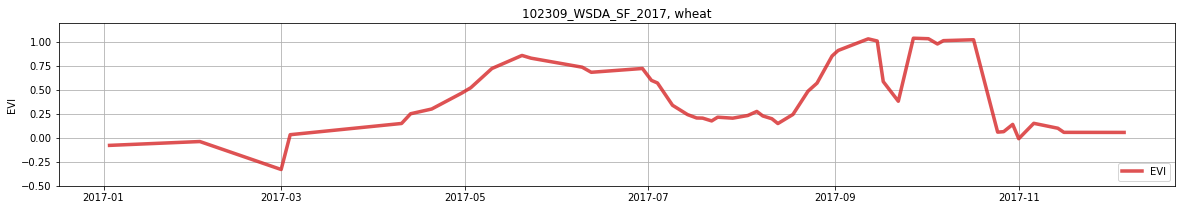

In [116]:
#  Pick a field
a_field = reduced[reduced.ID==reduced.ID.unique()[0]].copy()
a_field.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 3),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});
ax.grid(True);

ncp.plot_oneColumn(raw_dt=a_field, ax = ax, idx = "EVI", _label = "EVI", _color="#d62728")
plt.ylim([-0.5, 1.2])

# Efficiency 

We can and should make this more efficient. Do some of the calculations in place as opposed to creating a new ```dataframe``` and copying stuff.

#**Remove outliers**

In [28]:
reduced["ID"] = reduced["ID"].astype(str)
IDs = np.sort(reduced["ID"].unique())
indeks = "EVI"

In [49]:
no_outlier_df = pd.DataFrame(data = None,
                         index = np.arange(reduced.shape[0]), 
                         columns = reduced.columns)
counter = 0
row_pointer = 0
for a_poly in IDs:
    if (counter % 1000 == 0):
        print ("counter is [{:.0f}].".format(counter))
    curr_field = reduced[reduced["ID"]==a_poly].copy()
    # small fields may have nothing in them!
    if curr_field.shape[0] > 2:
        ##************************************************
        #
        #    Set negative index values to zero.
        #
        ##************************************************
        """
         we are killing some of the ourliers here and put them
         in the normal range! do we want to do it here? No, lets do it later.
        """
        # curr_field.loc[curr_field[indeks] < 0 , indeks] = 0 
        no_Outlier_TS = nc.interpolate_outliers_EVI_NDVI(outlier_input = curr_field, given_col = indeks)
        no_Outlier_TS.loc[no_Outlier_TS[indeks] < 0 , indeks] = 0 

        """
        it is possible that for a field we only have x=2 data points
        where all the EVI/NDVI is outlier. Then, there is nothing to 
        use for interpolation. So, hopefully interpolate_outliers_EVI_NDVI is returning an empty data table.
        """ 
        if len(no_Outlier_TS) > 0:
            no_outlier_df[row_pointer: row_pointer + curr_field.shape[0]] = no_Outlier_TS.values
            counter += 1
            row_pointer += curr_field.shape[0]

# Sanity check. Will neved occur. At least should not!
no_outlier_df.drop_duplicates(inplace=True)

counter is [0].


#**Remove the damn jumps**

Maybe we can remove old/previous dataframes to free memory up!

In [59]:
noJump_df = pd.DataFrame(data = None,
                         index = np.arange(no_outlier_df.shape[0]), 
                         columns = no_outlier_df.columns)
counter = 0
row_pointer = 0

for a_poly in IDs:
    if (counter % 1000 == 0):
        print ("counter is [{:.0f}].".format(counter))
    curr_field = no_outlier_df[no_outlier_df["ID"]==a_poly].copy()
    
    ################################################################
    # Sort by DoY (sanitary check)
    curr_field.sort_values(by=['human_system_start_time'], inplace=True)
    curr_field.reset_index(drop=True, inplace=True)
    
    ################################################################

    no_Outlier_TS = nc.correct_big_jumps_1DaySeries_JFD(dataTMS_jumpie = curr_field, 
                                                        give_col = indeks, 
                                                        maxjump_perDay = 0.018)

    noJump_df[row_pointer: row_pointer + curr_field.shape[0]] = no_Outlier_TS.values
    counter += 1
    row_pointer += curr_field.shape[0]

noJump_df['human_system_start_time'] = pd.to_datetime(noJump_df['human_system_start_time'])

# Sanity check. Will neved occur. At least should not!
print ("Shape of noJump_df before dropping duplicates is {}.".format(noJump_df.shape)) 
noJump_df.drop_duplicates(inplace=True)
print ("Shape of noJump_df before dropping duplicates is {}.".format(noJump_df.shape))

counter is [0].
Shape of noJump_df before dropping duplicates is (204, 11).
Shape of noJump_df before dropping duplicates is (204, 11).


# **Regularize**

Here we regularize the data. "Regularization" means pick a value for every 10-days. Doing this ensures 1. all inputs have the same length, 2. by picking maximum value of a VI we are reducing the noise in the time-series by eliminating noisy data points. For example, snow or shaddow can lead to understimating the true VI.

Moreover, here, I am keeping only 3 columns. As long as we have ```ID``` we can
merge the big dataframe with the final result later, here or externally.
This will reduce amount of memory needed. Perhaps I should do this
right the beginning.

In [101]:
# define parameters
regular_window_size = 10
reg_cols = ['ID', 'human_system_start_time', indeks] # list(noJump_df.columns)

st_yr = noJump_df.human_system_start_time.dt.year.min()
end_yr = noJump_df.human_system_start_time.dt.year.max()
no_days = (end_yr - st_yr + 1) * 366 # 14 years, each year 366 days!

no_steps = int(np.ceil(no_days / regular_window_size)) # no_days // regular_window_size

nrows = no_steps * len(IDs)
print('st_yr is {}.'.format(st_yr))
print('end_yr is {}.'.format(end_yr))
print('nrows is {}.'.format(nrows))

st_yr is 2017.
end_yr is 2017.
nrows is 148.


In [102]:
regular_df = pd.DataFrame(data = None,
                         index = np.arange(nrows), 
                         columns = reg_cols)
counter = 0
row_pointer = 0

for a_poly in IDs:
    if (counter % 1000 == 0):
        print ("counter is [{:.0f}].".format(counter))
    curr_field = noJump_df[noJump_df["ID"]==a_poly].copy()
    ################################################################
    # Sort by date (sanitary check)
    curr_field.sort_values(by=['human_system_start_time'], inplace=True)
    curr_field.reset_index(drop=True, inplace=True)
    
    ################################################################
    regularized_TS = nc.regularize_a_field(a_df = curr_field, \
                                           V_idks = indeks, \
                                           interval_size = regular_window_size,\
                                           start_year = st_yr, \
                                           end_year = end_yr)
    
    regularized_TS = nc.fill_theGap_linearLine(a_regularized_TS = regularized_TS, V_idx = indeks)
    # if (counter == 0):
    #     print ("regular_df columns:",     regular_df.columns)
    #     print ("regularized_TS.columns", regularized_TS.columns)
    
    ################################################################
    # row_pointer = no_steps * counter
    
    """
       The reason for the following line is that we assume all years are 366 days!
       so, the actual thing might be smaller!
    """
    # why this should not work?: It may leave some empty rows in regular_df
    # but we drop them at the end.
    regular_df[row_pointer : (row_pointer+regularized_TS.shape[0])] = regularized_TS.values
    row_pointer += regularized_TS.shape[0]

    # right_pointer = row_pointer + min(no_steps, regularized_TS.shape[0])
    # print('right_pointer - row_pointer + 1 is {}!'.format(right_pointer - row_pointer + 1))
    # print('len(regularized_TS.values) is {}!'.format(len(regularized_TS.values)))
    # try:
    #     ### I do not know why the hell the following did not work for training set!
    #     ### So, I converted this to try-except statement! hopefully, this will
    #     ### work, at least as temporary remedy! Why it worked well with 2008-2021 but not 2013-2015
    #     regular_df[row_pointer: right_pointer] = regularized_TS.values
    # except:
    #     regular_df[row_pointer: right_pointer+1] = regularized_TS.values
    counter += 1

regular_df['human_system_start_time'] = pd.to_datetime(regular_df['human_system_start_time'])
regular_df.drop_duplicates(inplace=True)
regular_df.dropna(inplace=True)

# Sanity Check
regular_df.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
regular_df.reset_index(drop=True, inplace=True)


counter is [0].


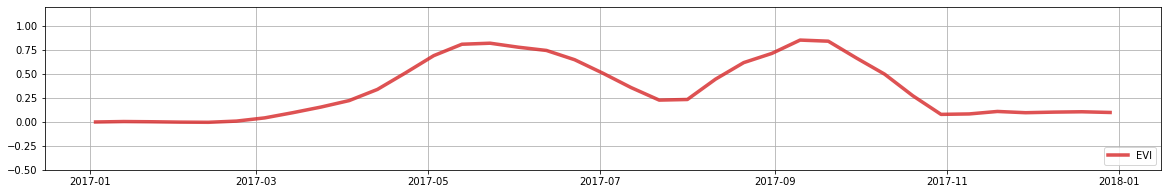

In [121]:
#  Pick a fields
a_field = regular_df[regular_df.ID==reduced.ID.unique()[0]].copy()
a_field.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 3), sharex='col', sharey='row',
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});
ax.grid(True);
ax.plot(a_field['human_system_start_time'], 
        a_field["EVI"], 
        linestyle='-', label="EVI", linewidth=3.5, color="#d62728", alpha=0.8)

ax.legend(loc="lower right");
plt.ylim([-0.5, 1.2]);

# **Savitzky-Golay Smoothing**

In [104]:
counter = 0
window_len = 7
polynomial_order = 3

for a_poly in IDs:
    if (counter % 300 == 0):
        print ("counter is [{:.0f}].".format(counter))
    curr_field = regular_df[regular_df["ID"]==a_poly].copy()
    
    # Smoothen by Savitzky-Golay
    SG = scipy.signal.savgol_filter(curr_field[indeks].values, window_length=window_len, polyorder=polynomial_order)
    SG[SG > 1 ] = 1 # SG might violate the boundaries. clip them:
    SG[SG < -1 ] = -1
    regular_df.loc[curr_field.index, indeks] = SG
    counter += 1

counter is [0].


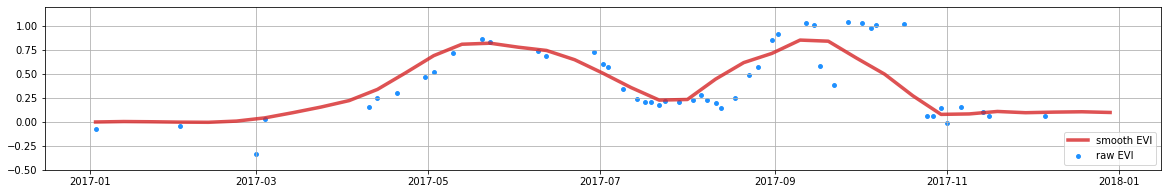

In [124]:
#  Pick a fields
an_ID = reduced.ID.unique()[0]
a_field = regular_df[regular_df.ID==an_ID].copy()
a_field.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 3),
                       sharex='col', sharey='row',
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});
ax.grid(True);
ax.plot(a_field['human_system_start_time'], 
        a_field["EVI"], 
        linestyle='-',  linewidth=3.5, color="#d62728", alpha=0.8,
        label="smooth EVI")

# Raw data where we started from
raw = reduced[reduced.ID==an_ID].copy()
raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
ax.scatter(raw['human_system_start_time'], raw["EVI"], s=15, c='dodgerblue', label="raw EVI");

ax.legend(loc="lower right");
plt.ylim([-0.5, 1.2]);

# **Season Detection**